# Momentum effect: Is there an advantage to investing when a stock's acceleration is high and positive?

Momentum indicators:
1. Relative strength index (RSI) https://www.investopedia.com/terms/r/rsi.asp
2. MACD (Moving Average Convergence Divergence)https://www.investopedia.com/terms/m/macd.asp#:~:text=MACD%20is%20calculated%20by%20subtracting,an%20exponentially%20weighted%20moving%20average.
3. Price Rate of Change 
4. More indicators as desired

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_RSI(data, window):
    delta = data.diff()   
    gains, losses = delta.copy(), delta.copy()
    gains[gains < 0] = 0 # makes sure gains only contain postive values
    losses[losses > 0] = 0 # makes sure losses only contain negative values
    avg_gain = pd.Series(gains).rolling(window).mean() # calculates the rolling mean over window amount of time points
    avg_loss = pd.Series(losses).rolling(window).mean().abs()
    RSI = 100 - (100/(1+(avg_gain/avg_loss)))
    return RSI

#Strategy: if RSI < 30 the stock is oversold/undervalued, if RSI>70 the stock is overbought/overvalued
def stock_signal(rsi_series):
    latest_rsi = rsi_series.iloc[-1]  # most recent rsi value
    if latest_rsi < 30:
        return 1  # buy
    elif latest_rsi > 70:
        return -1  # sell
    else:
        return 0  # hold

In [8]:
# def calculate_ROC(data,window):
#     return data.pct_change(window)

In [3]:
tickers = ['GOOG', 'TSLA', 'META', 'NVDA', 'AAPL', 'EBAY', 'AMZN', 'NFLX', 'MSFT', 'INTC']
start_date = '2023-11-01'
end_date = '2023-12-30'

rsi_values = {}
#roc_values = {}
signals = {}
returns = {}

for stock_symbol in tickers:
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    rsi_values[stock_symbol] = calculate_RSI(stock_data['Adj Close'], window=14)
    #roc_values[stock_symbol] = calculate_ROC(stock_data['Adj Close'], window = 14)
    signals[stock_symbol] = stock_signal(rsi_values[stock_symbol])
    returns[stock_symbol] = ((stock_data['Adj Close'].pct_change())*100)
    print(f"RSI of {stock_symbol}: {rsi_values[stock_symbol]}")
    print(f"Returns of {stock_symbol}: {returns[stock_symbol]}")  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

RSI of GOOG: Date
2023-11-01          NaN
2023-11-02          NaN
2023-11-03          NaN
2023-11-06          NaN
2023-11-07          NaN
2023-11-08          NaN
2023-11-09          NaN
2023-11-10          NaN
2023-11-13          NaN
2023-11-14          NaN
2023-11-15          NaN
2023-11-16          NaN
2023-11-17          NaN
2023-11-20          NaN
2023-11-21    79.784396
2023-11-22    80.200671
2023-11-24    70.712441
2023-11-27    68.292679
2023-11-28    67.610425
2023-11-29    58.254456
2023-11-30    55.594570
2023-12-01    47.962577
2023-12-04    42.633390
2023-12-05    42.549020
2023-12-06    37.873540
2023-12-07    49.502203
2023-12-08    49.403800
2023-12-11    43.836155
2023-12-12    40.596703
2023-12-13    38.095227
2023-12-14    39.704678
2023-12-15    41.529176
2023-12-18    47.412233
2023-12-19    53.229523
2023-12-20    61.299206
2023-12-21    65.738644
2023-12-22    74.016655
2023-12-26    72.182037
2023-12-27    70.915196
2023-12-28    58.289393
2023-12-29    63.74120


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of NVDA: Date
2023-11-01          NaN
2023-11-02          NaN
2023-11-03          NaN
2023-11-06          NaN
2023-11-07          NaN
2023-11-08          NaN
2023-11-09          NaN
2023-11-10          NaN
2023-11-13          NaN
2023-11-14          NaN
2023-11-15          NaN
2023-11-16          NaN
2023-11-17          NaN
2023-11-20          NaN
2023-11-21    86.458050
2023-11-22    74.818981
2023-11-24    63.942853
2023-11-27    62.897398
2023-11-28    59.449054
2023-11-29    58.178404
2023-11-30    49.148364
2023-12-01    41.456234
2023-12-04    34.691844
2023-12-05    34.846426
2023-12-06    33.864948
2023-12-07    36.883642
2023-12-08    42.363889
2023-12-11    33.537785
2023-12-12    40.519541
2023-12-13    47.225869
2023-12-14    52.736708
2023-12-15    53.065697
2023-12-18    59.909905
2023-12-19    56.351699
2023-12-20    55.757730
2023-12-21    58.877467
2023-12-22    64.502632
2023-12-26    62.503442
2023-12-27    69.719873
2023-12-28    66.371970
2023-12-29    62.55917

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of AMZN: Date
2023-11-01          NaN
2023-11-02          NaN
2023-11-03          NaN
2023-11-06          NaN
2023-11-07          NaN
2023-11-08          NaN
2023-11-09          NaN
2023-11-10          NaN
2023-11-13          NaN
2023-11-14          NaN
2023-11-15          NaN
2023-11-16          NaN
2023-11-17          NaN
2023-11-20          NaN
2023-11-21    64.705856
2023-11-22    67.142837
2023-11-24    66.477713
2023-11-27    66.272880
2023-11-28    59.694770
2023-11-29    59.481228
2023-11-30    63.003283
2023-12-01    59.088518
2023-12-04    55.539136
2023-12-05    52.821317
2023-12-06    53.492078
2023-12-07    59.693627
2023-12-08    55.870025
2023-12-11    49.389610
2023-12-12    59.411149
2023-12-13    56.061442
2023-12-14    51.793230
2023-12-15    55.458102
2023-12-18    64.715729
2023-12-19    65.900329
2023-12-20    62.093849
2023-12-21    63.243858
2023-12-22    67.919790
2023-12-26    64.901866
2023-12-27    72.477032
2023-12-28    68.786107
2023-12-29    62.41757

[*********************100%%**********************]  1 of 1 completed

RSI of INTC: Date
2023-11-01          NaN
2023-11-02          NaN
2023-11-03          NaN
2023-11-06          NaN
2023-11-07          NaN
2023-11-08          NaN
2023-11-09          NaN
2023-11-10          NaN
2023-11-13          NaN
2023-11-14          NaN
2023-11-15          NaN
2023-11-16          NaN
2023-11-17          NaN
2023-11-20          NaN
2023-11-21    76.962560
2023-11-22    76.212089
2023-11-24    75.904115
2023-11-27    76.582802
2023-11-28    75.138089
2023-11-29    82.742518
2023-11-30    81.826559
2023-12-01    72.718795
2023-12-04    67.913037
2023-12-05    61.674403
2023-12-06    53.235286
2023-12-07    42.805771
2023-12-08    43.416385
2023-12-11    48.929328
2023-12-12    52.288326
2023-12-13    54.870127
2023-12-14    56.380769
2023-12-15    59.980790
2023-12-18    56.797007
2023-12-19    57.818179
2023-12-20    54.545425
2023-12-21    63.893492
2023-12-22    74.458854
2023-12-26    81.497788
2023-12-27    85.865429
2023-12-28    82.389903
2023-12-29    80.66608

[*********************100%%**********************]  1 of 1 completed


GOOG
0


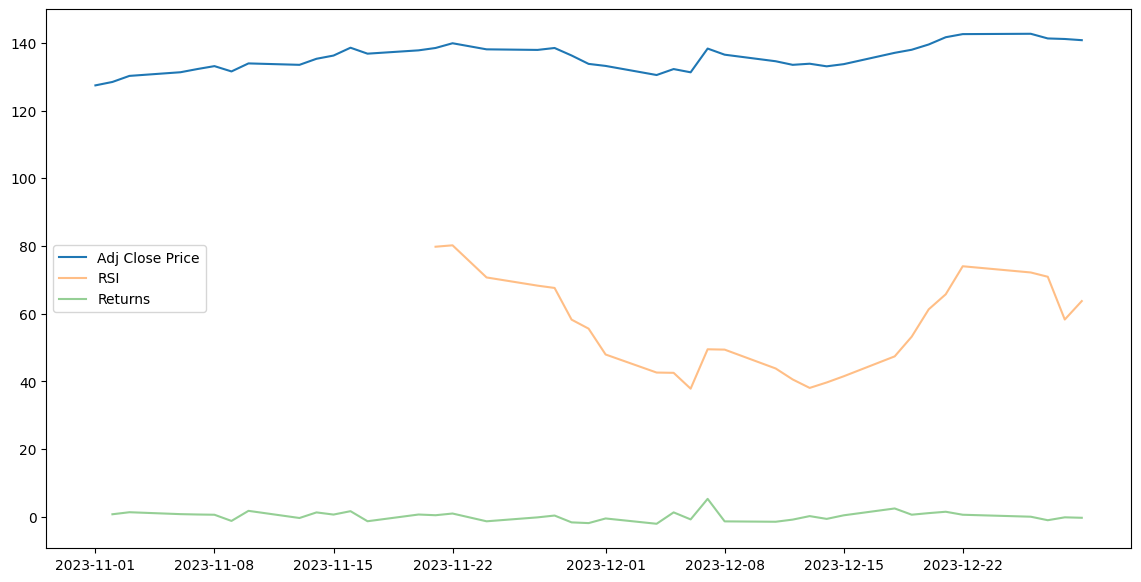

[*********************100%%**********************]  1 of 1 completed

TSLA
0


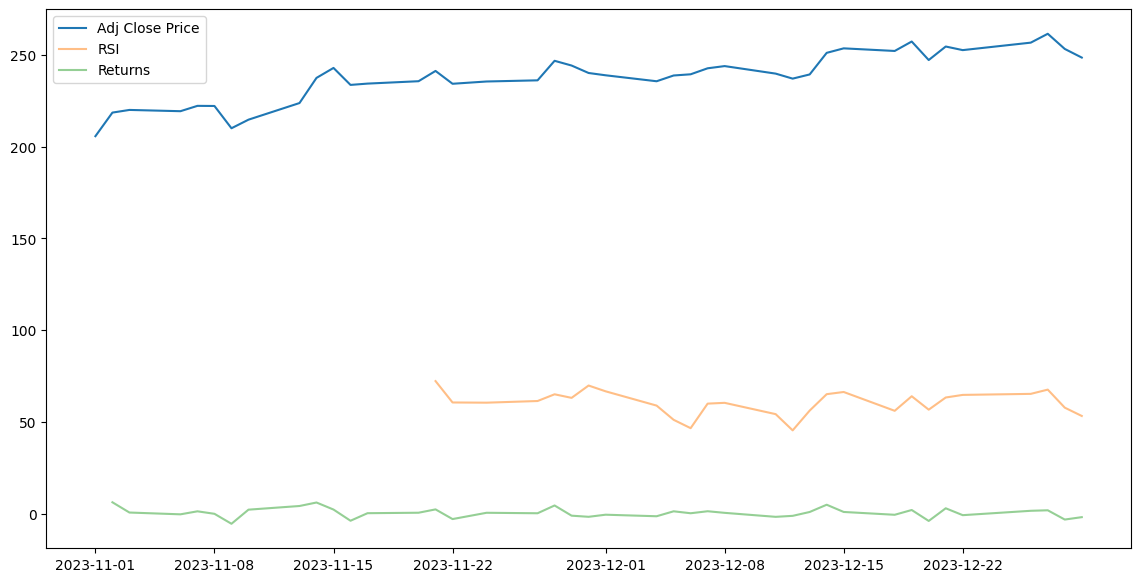

[*********************100%%**********************]  1 of 1 completed


META
-1


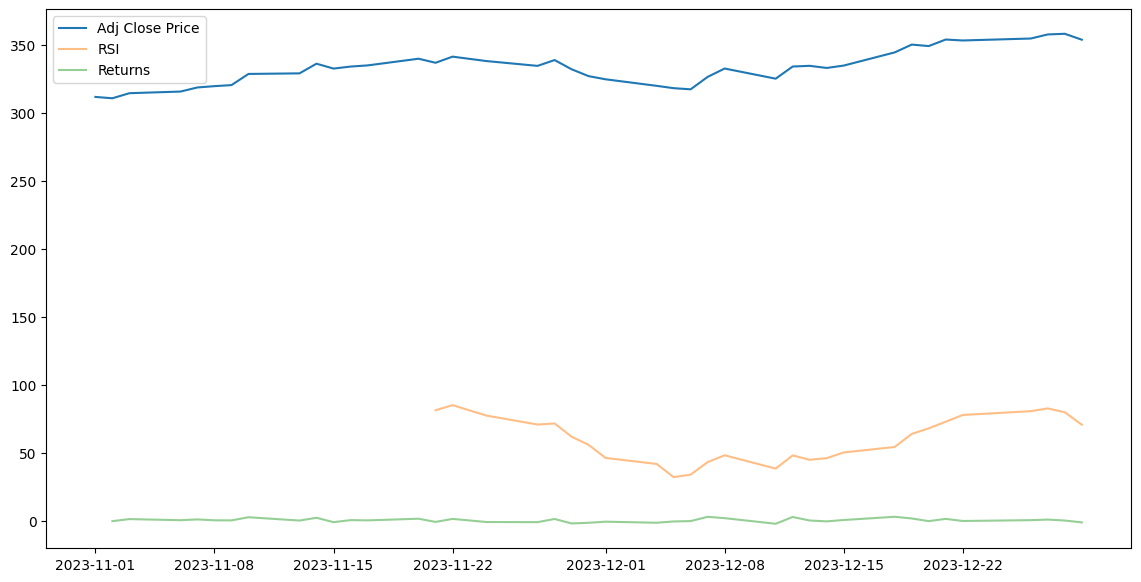

[*********************100%%**********************]  1 of 1 completed


NVDA
0


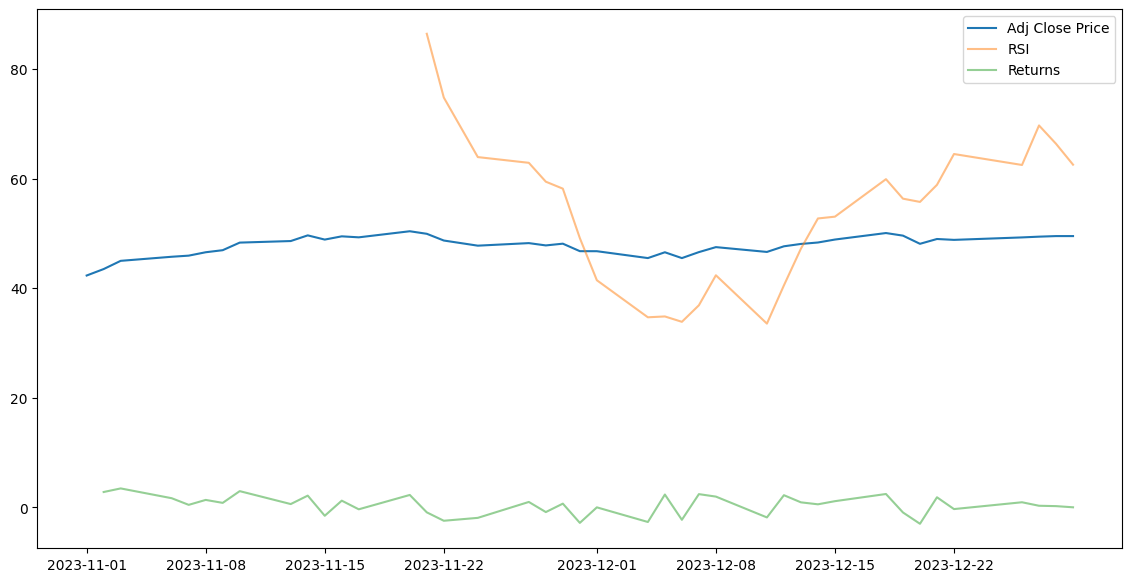

[*********************100%%**********************]  1 of 1 completed


AAPL
0


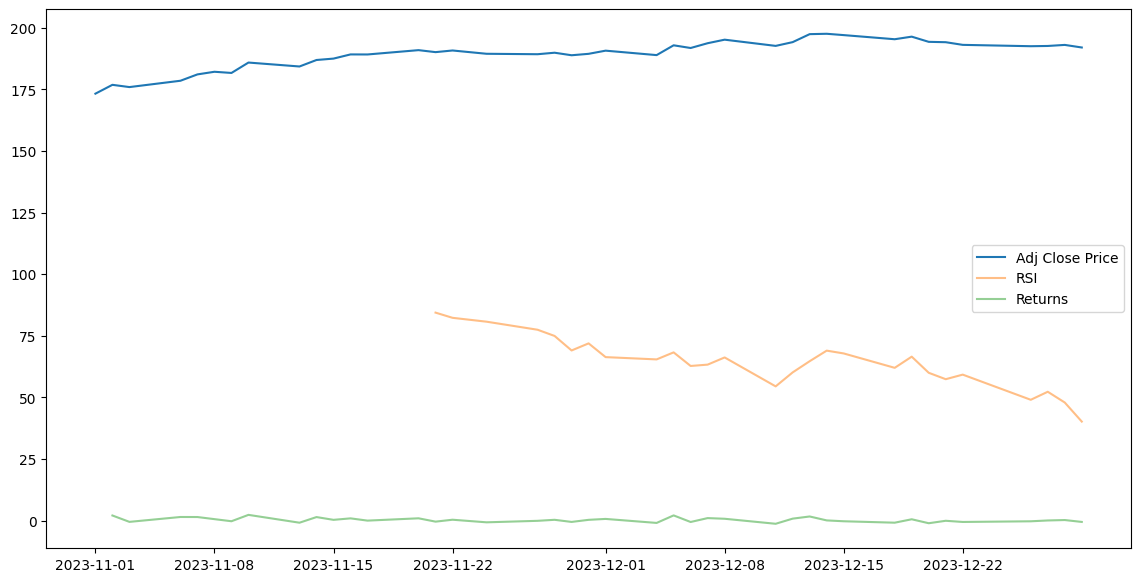

[*********************100%%**********************]  1 of 1 completed


EBAY
0


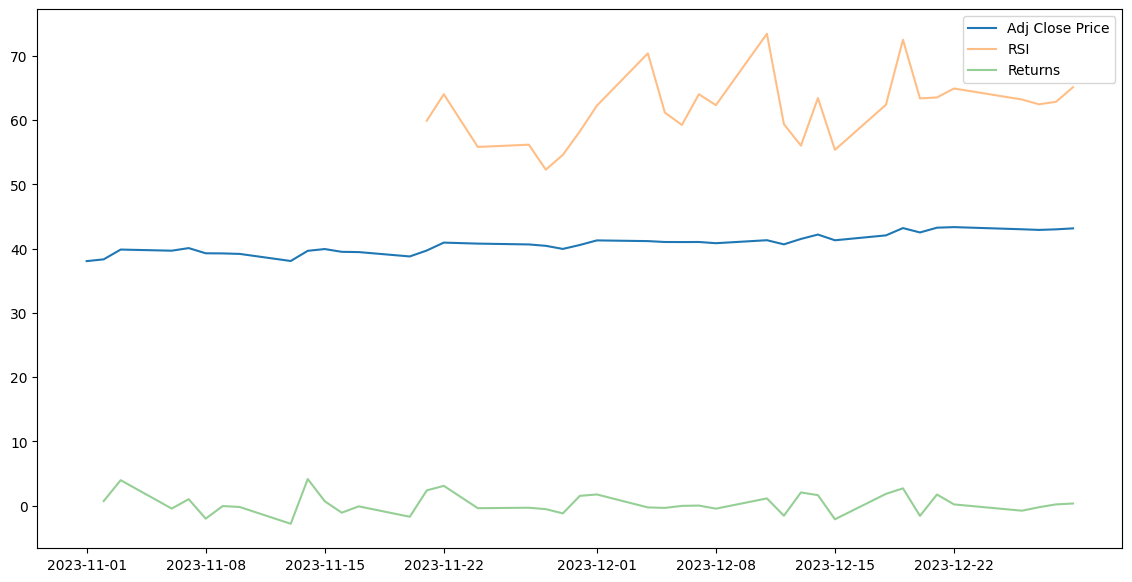

[*********************100%%**********************]  1 of 1 completed


AMZN
0


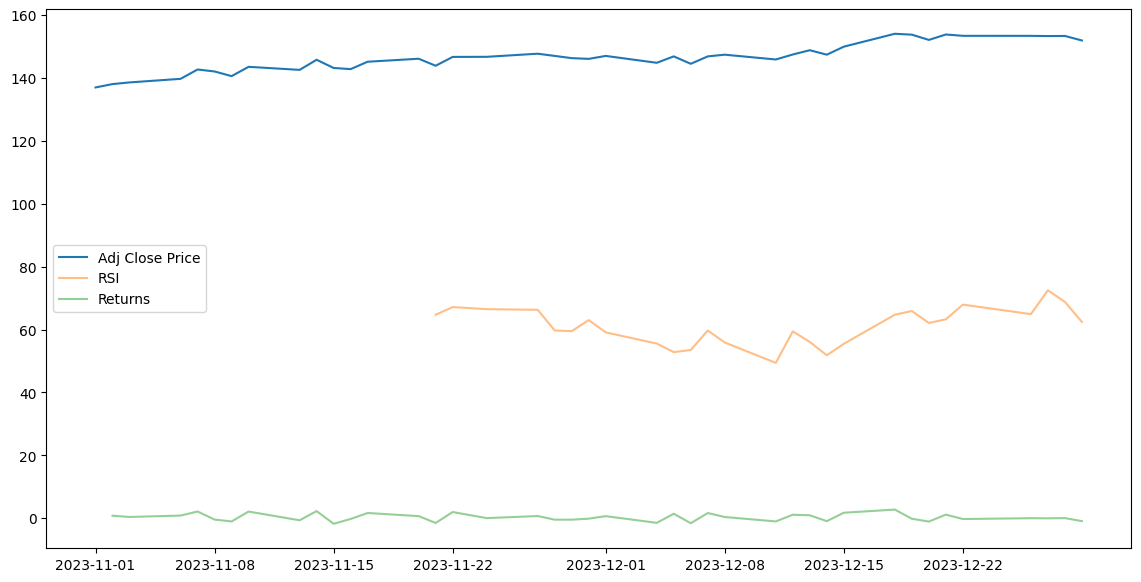

[*********************100%%**********************]  1 of 1 completed


NFLX
0


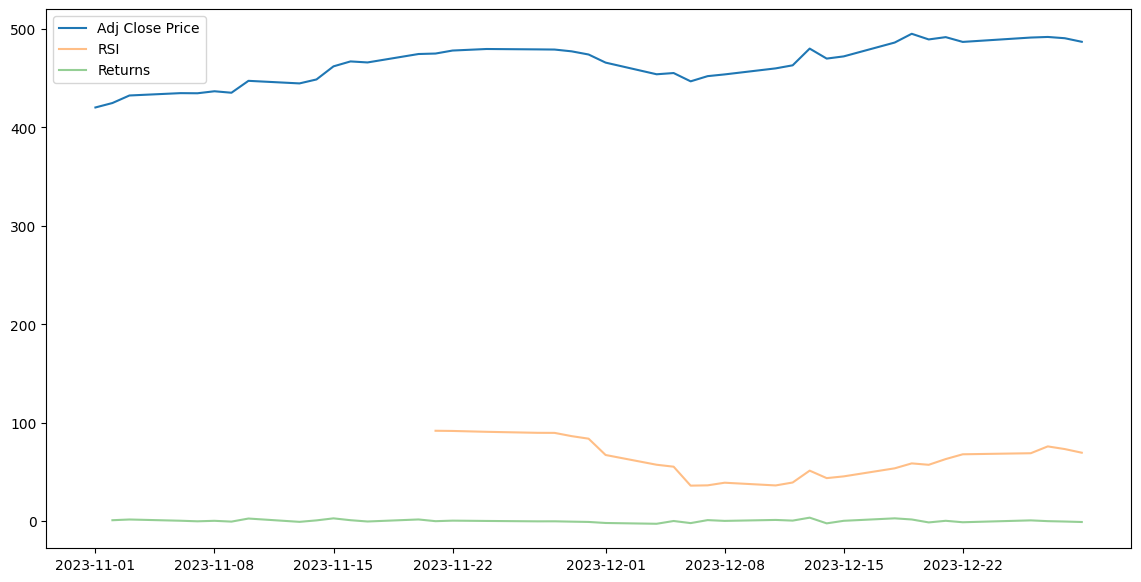

[*********************100%%**********************]  1 of 1 completed


MSFT
0


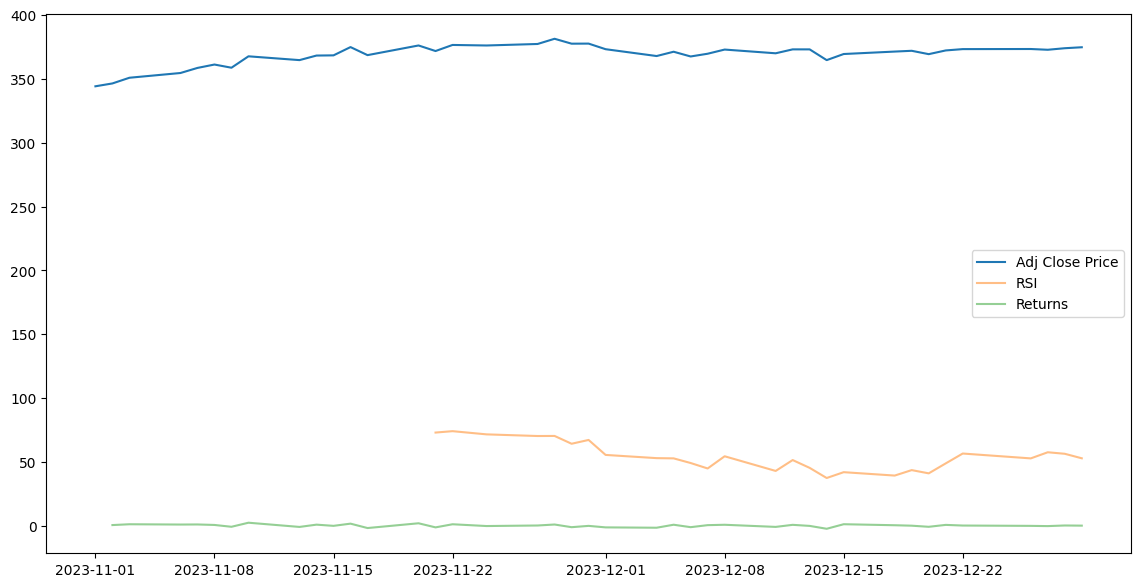

[*********************100%%**********************]  1 of 1 completed


INTC
-1


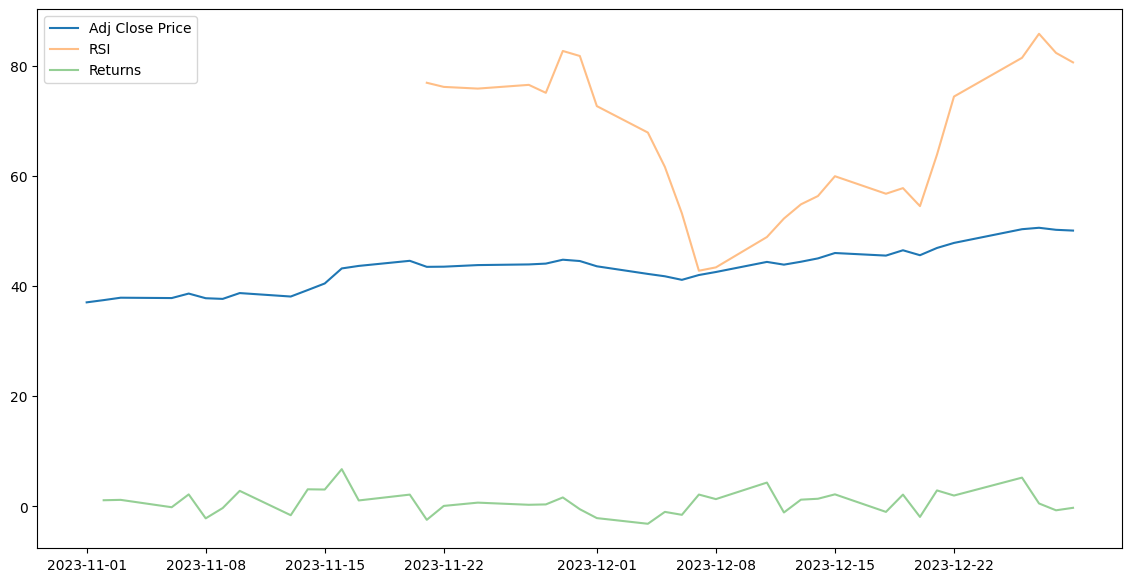

In [4]:
for stock_symbol in tickers:
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    print(stock_symbol)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Adj Close'], label='Adj Close Price')
    plt.plot(rsi_values[stock_symbol], label='RSI', alpha=0.5)
    plt.plot(returns[stock_symbol], label='Returns', alpha=0.5)
    print(signals[stock_symbol])
    plt.legend()
    plt.show()

In [5]:
# 1 minute intervals over 5 days
for stock_symbol in tickers:
    stock_data = yf.download(stock_symbol, period = "5d",  interval = "1m")
    rsi_values[stock_symbol] = calculate_RSI(stock_data['Adj Close'], window=14) 
    print(f"RSI of {stock_symbol}: {rsi_values[stock_symbol]}")  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of GOOG: Datetime
2024-06-05 09:30:00-04:00          NaN
2024-06-05 09:31:00-04:00          NaN
2024-06-05 09:32:00-04:00          NaN
2024-06-05 09:33:00-04:00          NaN
2024-06-05 09:34:00-04:00          NaN
                               ...    
2024-06-11 15:55:00-04:00    58.034696
2024-06-11 15:56:00-04:00    59.555986
2024-06-11 15:57:00-04:00    63.288088
2024-06-11 15:58:00-04:00    62.314266
2024-06-11 15:59:00-04:00    60.980264
Name: Adj Close, Length: 1948, dtype: float64
RSI of TSLA: Datetime
2024-06-05 09:30:00-04:00          NaN
2024-06-05 09:31:00-04:00          NaN
2024-06-05 09:32:00-04:00          NaN
2024-06-05 09:33:00-04:00          NaN
2024-06-05 09:34:00-04:00          NaN
                               ...    
2024-06-11 15:55:00-04:00    84.620108
2024-06-11 15:56:00-04:00    82.206081
2024-06-11 15:57:00-04:00    81.738958
2024-06-11 15:58:00-04:00    79.143703
2024-06-11 15:59:00-04:00    79.073342
Name: Adj Close, Length: 1948, dtype: float64


[*********************100%%**********************]  1 of 1 completed


RSI of META: Datetime
2024-06-05 09:30:00-04:00          NaN
2024-06-05 09:31:00-04:00          NaN
2024-06-05 09:32:00-04:00          NaN
2024-06-05 09:33:00-04:00          NaN
2024-06-05 09:34:00-04:00          NaN
                               ...    
2024-06-11 15:55:00-04:00    59.692399
2024-06-11 15:56:00-04:00    52.560029
2024-06-11 15:57:00-04:00    58.158765
2024-06-11 15:58:00-04:00    62.859357
2024-06-11 15:59:00-04:00    65.381655
Name: Adj Close, Length: 1948, dtype: float64


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of NVDA: Datetime
2024-06-05 09:30:00-04:00          NaN
2024-06-05 09:31:00-04:00          NaN
2024-06-05 09:32:00-04:00          NaN
2024-06-05 09:33:00-04:00          NaN
2024-06-05 09:34:00-04:00          NaN
                               ...    
2024-06-11 15:55:00-04:00    51.898934
2024-06-11 15:56:00-04:00    53.915966
2024-06-11 15:57:00-04:00    51.494289
2024-06-11 15:58:00-04:00    56.597550
2024-06-11 15:59:00-04:00    60.025294
Name: Adj Close, Length: 1948, dtype: float64
RSI of AAPL: Datetime
2024-06-05 09:30:00-04:00          NaN
2024-06-05 09:31:00-04:00          NaN
2024-06-05 09:32:00-04:00          NaN
2024-06-05 09:33:00-04:00          NaN
2024-06-05 09:34:00-04:00          NaN
                               ...    
2024-06-11 15:55:00-04:00    80.716214
2024-06-11 15:56:00-04:00    74.317840
2024-06-11 15:57:00-04:00    75.020741
2024-06-11 15:58:00-04:00    68.486666
2024-06-11 15:59:00-04:00    80.253337
Name: Adj Close, Length: 1948, dtype: float64


[*********************100%%**********************]  1 of 1 completed


RSI of EBAY: Datetime
2024-06-05 09:30:00-04:00          NaN
2024-06-05 09:31:00-04:00          NaN
2024-06-05 09:32:00-04:00          NaN
2024-06-05 09:33:00-04:00          NaN
2024-06-05 09:34:00-04:00          NaN
                               ...    
2024-06-11 15:55:00-04:00    48.022828
2024-06-11 15:56:00-04:00    44.578036
2024-06-11 15:57:00-04:00    46.913383
2024-06-11 15:58:00-04:00    51.162605
2024-06-11 15:59:00-04:00    61.538462
Name: Adj Close, Length: 1939, dtype: float64


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of AMZN: Datetime
2024-06-05 09:30:00-04:00          NaN
2024-06-05 09:31:00-04:00          NaN
2024-06-05 09:32:00-04:00          NaN
2024-06-05 09:33:00-04:00          NaN
2024-06-05 09:34:00-04:00          NaN
                               ...    
2024-06-11 15:55:00-04:00    70.982554
2024-06-11 15:56:00-04:00    75.917481
2024-06-11 15:57:00-04:00    76.317043
2024-06-11 15:58:00-04:00    78.325842
2024-06-11 15:59:00-04:00    82.728055
Name: Adj Close, Length: 1948, dtype: float64
RSI of NFLX: Datetime
2024-06-05 09:30:00-04:00          NaN
2024-06-05 09:31:00-04:00          NaN
2024-06-05 09:32:00-04:00          NaN
2024-06-05 09:33:00-04:00          NaN
2024-06-05 09:34:00-04:00          NaN
                               ...    
2024-06-11 15:55:00-04:00    59.282650
2024-06-11 15:56:00-04:00    51.985093
2024-06-11 15:57:00-04:00    58.596837
2024-06-11 15:58:00-04:00    59.589055
2024-06-11 15:59:00-04:00    60.732022
Name: Adj Close, Length: 1877, dtype: float64


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

RSI of MSFT: Datetime
2024-06-05 09:30:00-04:00          NaN
2024-06-05 09:31:00-04:00          NaN
2024-06-05 09:32:00-04:00          NaN
2024-06-05 09:33:00-04:00          NaN
2024-06-05 09:34:00-04:00          NaN
                               ...    
2024-06-11 15:55:00-04:00    60.662938
2024-06-11 15:56:00-04:00    56.925461
2024-06-11 15:57:00-04:00    62.287809
2024-06-11 15:58:00-04:00    63.355933
2024-06-11 15:59:00-04:00    66.398759
Name: Adj Close, Length: 1948, dtype: float64
RSI of INTC: Datetime
2024-06-05 09:30:00-04:00          NaN
2024-06-05 09:31:00-04:00          NaN
2024-06-05 09:32:00-04:00          NaN
2024-06-05 09:33:00-04:00          NaN
2024-06-05 09:34:00-04:00          NaN
                               ...    
2024-06-11 15:55:00-04:00    49.729311
2024-06-11 15:56:00-04:00    51.398884
2024-06-11 15:57:00-04:00    54.660664
2024-06-11 15:58:00-04:00    59.885092
2024-06-11 15:59:00-04:00    62.575635
Name: Adj Close, Length: 1948, dtype: float64


[*********************100%%**********************]  1 of 1 completed

GOOG
0


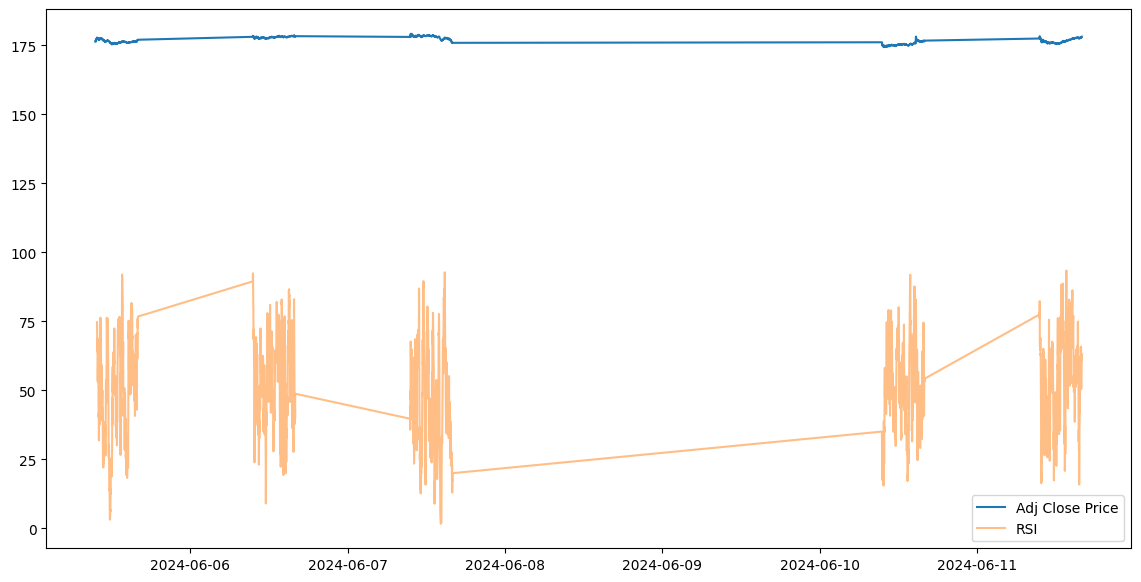

[*********************100%%**********************]  1 of 1 completed

TSLA
0


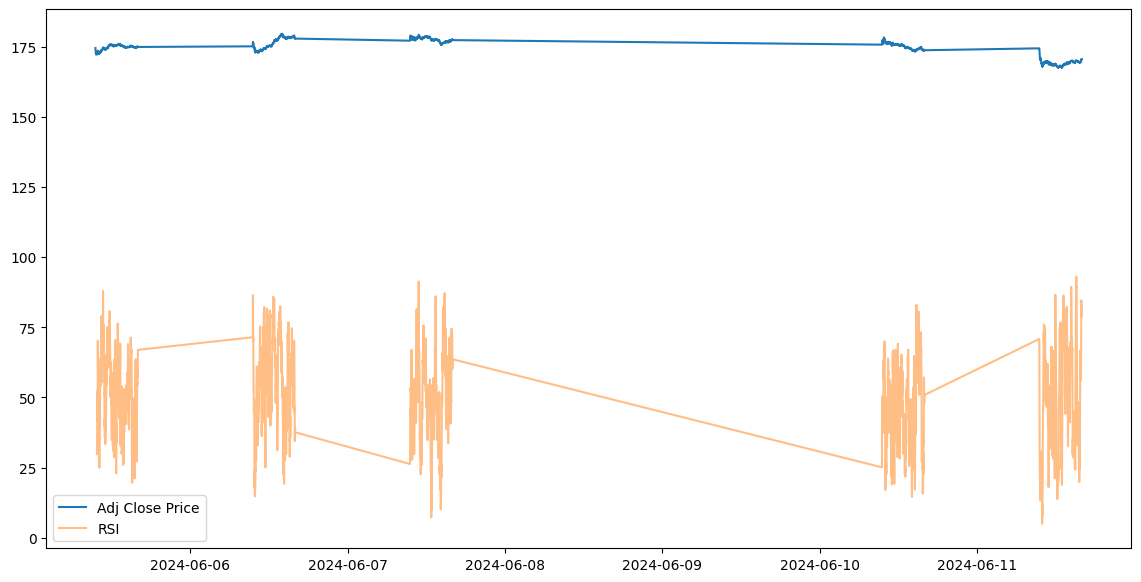

[*********************100%%**********************]  1 of 1 completed


META
-1


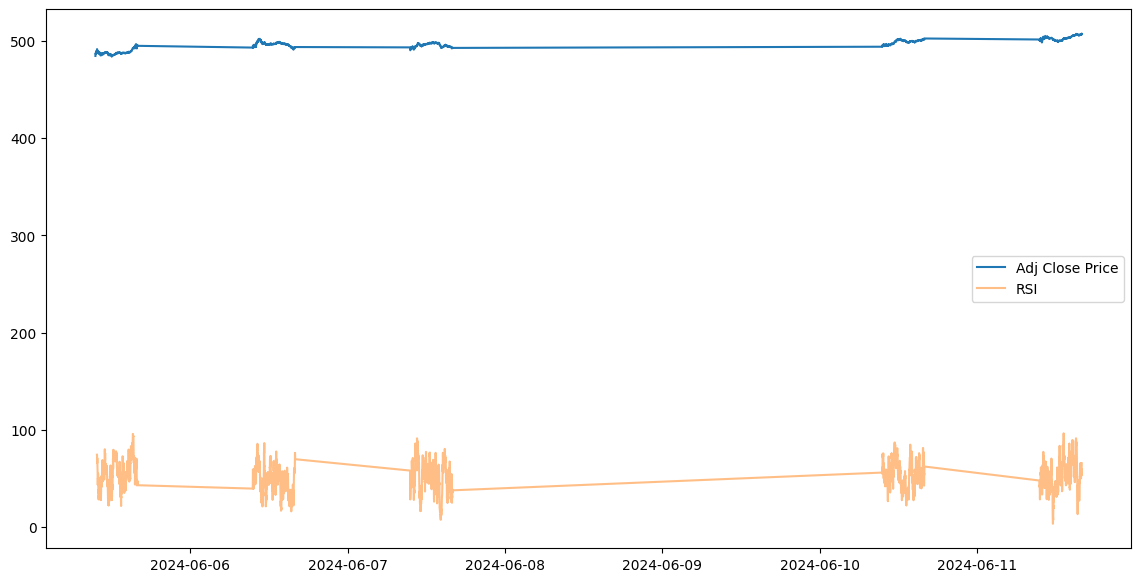

[*********************100%%**********************]  1 of 1 completed

NVDA
0


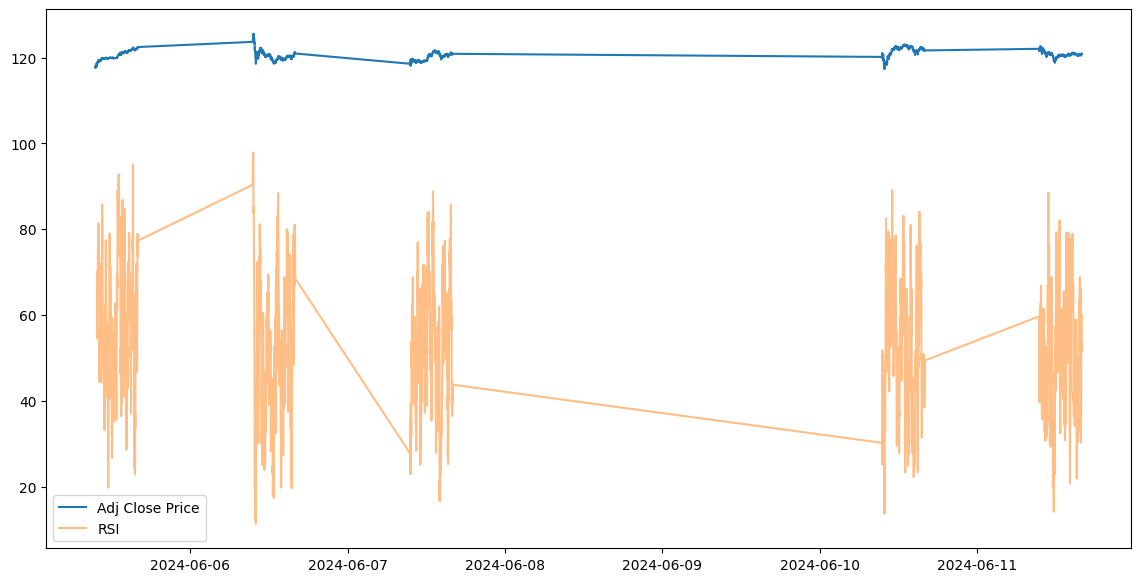

[*********************100%%**********************]  1 of 1 completed

AAPL
0


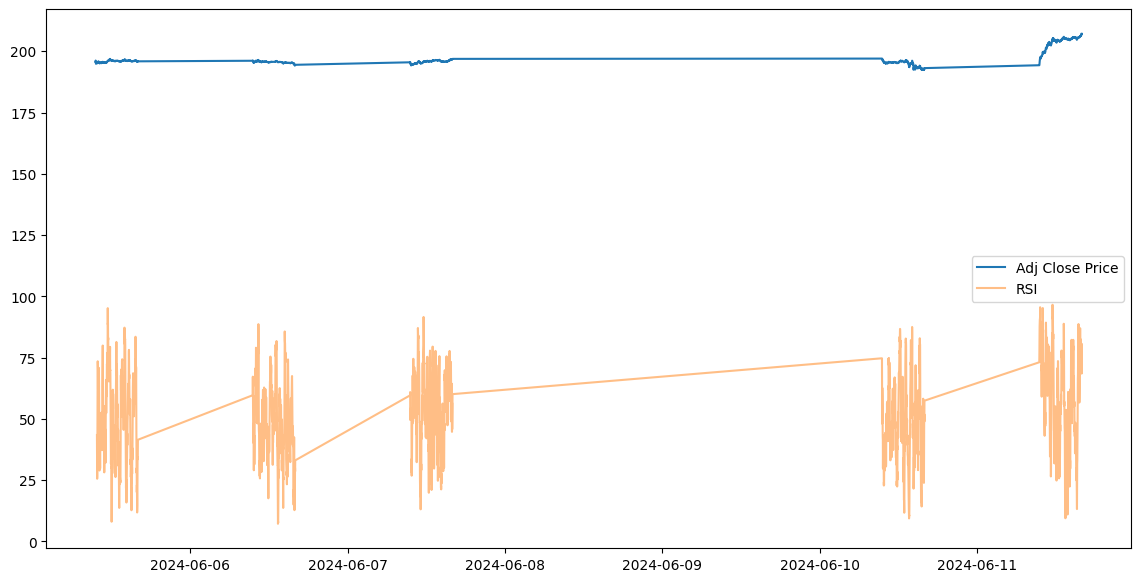

[*********************100%%**********************]  1 of 1 completed

EBAY
0


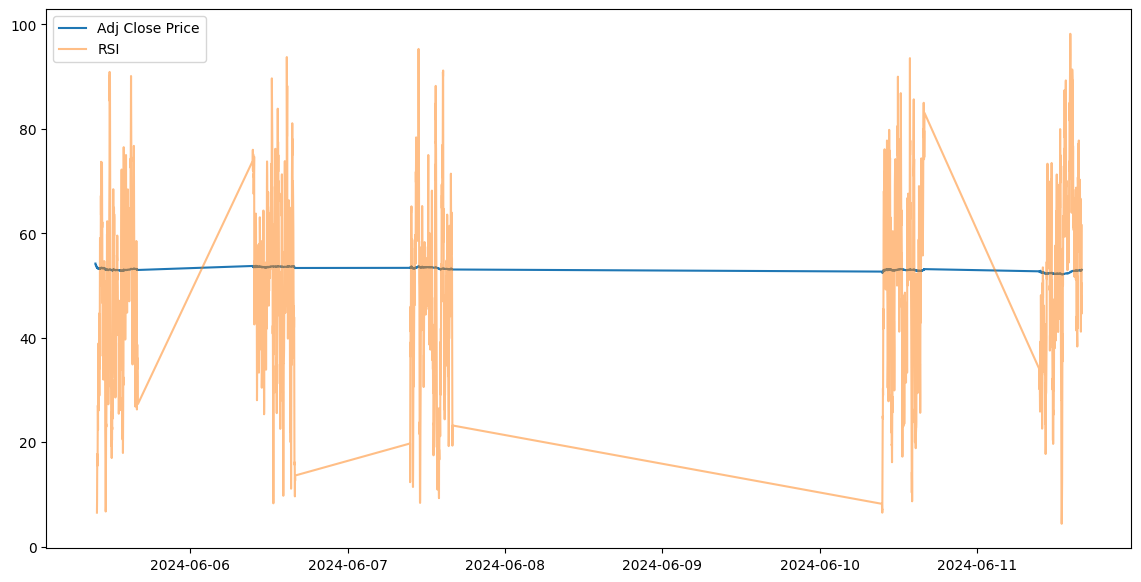

[*********************100%%**********************]  1 of 1 completed


AMZN
0


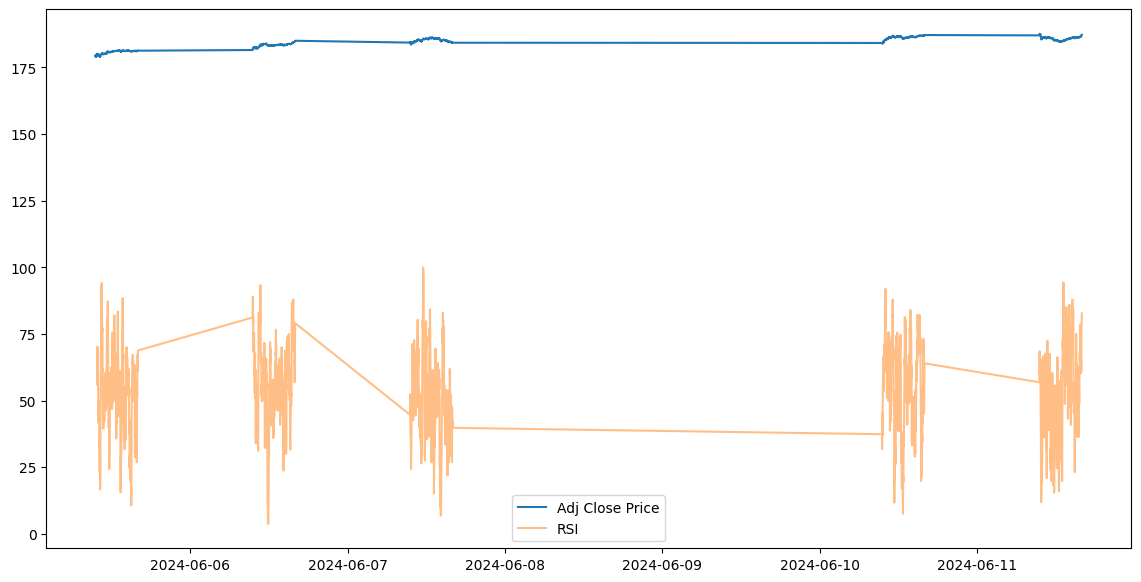

[*********************100%%**********************]  1 of 1 completed

NFLX
0


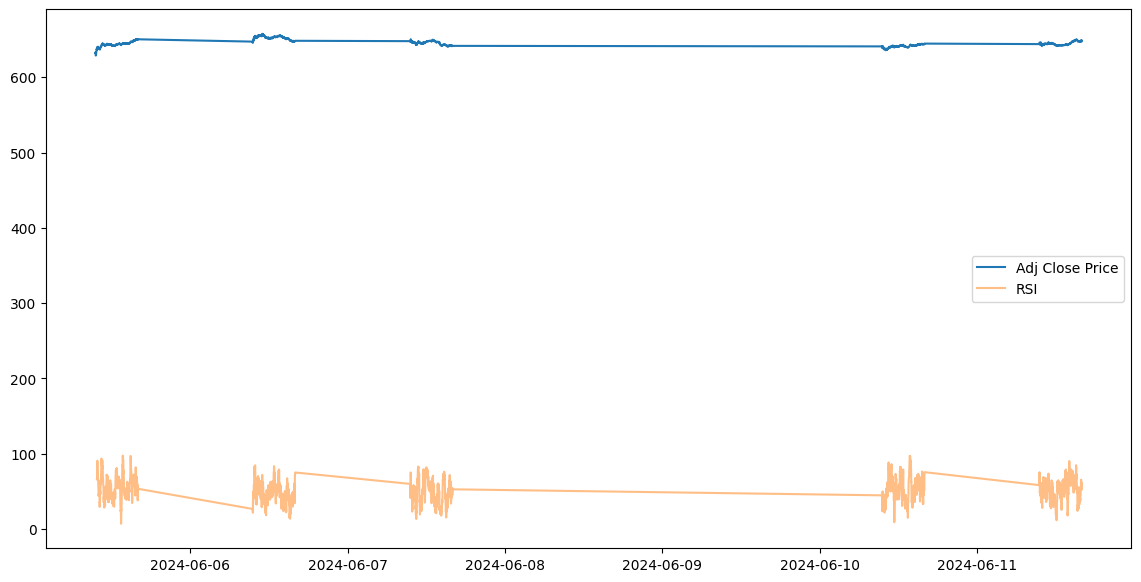

[*********************100%%**********************]  1 of 1 completed

MSFT
0


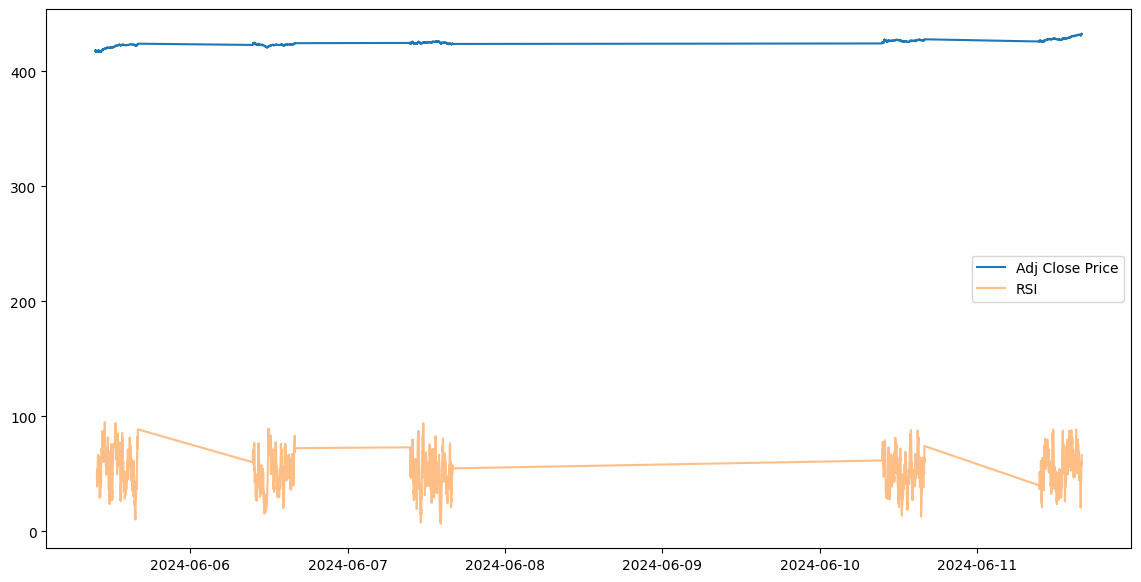

[*********************100%%**********************]  1 of 1 completed


INTC
-1


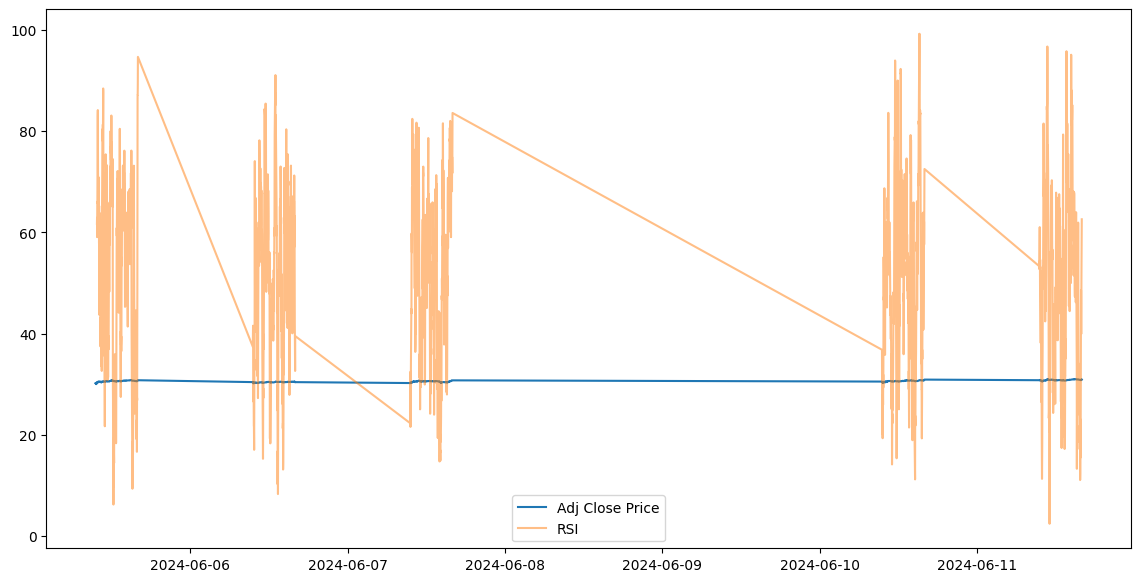

In [9]:
for stock_symbol in tickers:
    stock_data = yf.download(stock_symbol, period = "5d",  interval = "1m")
    print(stock_symbol)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Adj Close'], label='Adj Close Price')
    plt.plot(rsi_values[stock_symbol], label='RSI', alpha=0.5)
    print(signals[stock_symbol])
    plt.legend()
    plt.show()

In [10]:
# 60 minute interval over 5 days
for stock_symbol in tickers:
    stock_data = yf.download(stock_symbol, period = "5d",  interval = "60m")
    rsi_values[stock_symbol] = calculate_RSI(stock_data['Adj Close'], window=14) 
    print(f"RSI of {stock_symbol}: {rsi_values[stock_symbol]}")  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of GOOG: Datetime
2024-06-05 09:30:00          NaN
2024-06-05 10:30:00          NaN
2024-06-05 11:30:00          NaN
2024-06-05 12:30:00          NaN
2024-06-05 13:30:00          NaN
2024-06-05 14:30:00          NaN
2024-06-05 15:30:00          NaN
2024-06-06 09:30:00          NaN
2024-06-06 10:30:00          NaN
2024-06-06 11:30:00          NaN
2024-06-06 12:30:00          NaN
2024-06-06 13:30:00          NaN
2024-06-06 14:30:00          NaN
2024-06-06 15:30:00          NaN
2024-06-07 09:30:00    55.904107
2024-06-07 10:30:00    64.308178
2024-06-07 11:30:00    76.630906
2024-06-07 12:30:00    68.154879
2024-06-07 13:30:00    59.265365
2024-06-07 14:30:00    59.194068
2024-06-07 15:30:00    41.304677
2024-06-10 09:30:00    31.700796
2024-06-10 10:30:00    32.258541
2024-06-10 11:30:00    29.734634
2024-06-10 12:30:00    24.576042
2024-06-10 13:30:00    34.210583
2024-06-10 14:30:00    36.118892
2024-06-10 15:30:00    38.942371
2024-06-11 09:30:00    37.500076
2024-06-11 10:30:00  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of NVDA: Datetime
2024-06-05 09:30:00          NaN
2024-06-05 10:30:00          NaN
2024-06-05 11:30:00          NaN
2024-06-05 12:30:00          NaN
2024-06-05 13:30:00          NaN
2024-06-05 14:30:00          NaN
2024-06-05 15:30:00          NaN
2024-06-06 09:30:00          NaN
2024-06-06 10:30:00          NaN
2024-06-06 11:30:00          NaN
2024-06-06 12:30:00          NaN
2024-06-06 13:30:00          NaN
2024-06-06 14:30:00          NaN
2024-06-06 15:30:00          NaN
2024-06-07 09:30:00    45.130293
2024-06-07 10:30:00    45.612893
2024-06-07 11:30:00    54.072027
2024-06-07 12:30:00    50.636461
2024-06-07 13:30:00    43.388913
2024-06-07 14:30:00    44.274279
2024-06-07 15:30:00    42.112977
2024-06-10 09:30:00    43.940423
2024-06-10 10:30:00    58.156379
2024-06-10 11:30:00    61.742349
2024-06-10 12:30:00    60.694523
2024-06-10 13:30:00    56.859181
2024-06-10 14:30:00    59.182505
2024-06-10 15:30:00    52.930965
2024-06-11 09:30:00    60.353509
2024-06-11 10:30:00  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


RSI of AMZN: Datetime
2024-06-05 09:30:00          NaN
2024-06-05 10:30:00          NaN
2024-06-05 11:30:00          NaN
2024-06-05 12:30:00          NaN
2024-06-05 13:30:00          NaN
2024-06-05 14:30:00          NaN
2024-06-05 15:30:00          NaN
2024-06-06 09:30:00          NaN
2024-06-06 10:30:00          NaN
2024-06-06 11:30:00          NaN
2024-06-06 12:30:00          NaN
2024-06-06 13:30:00          NaN
2024-06-06 14:30:00          NaN
2024-06-06 15:30:00          NaN
2024-06-07 09:30:00    85.233643
2024-06-07 10:30:00    85.632737
2024-06-07 11:30:00    85.201191
2024-06-07 12:30:00    84.397568
2024-06-07 13:30:00    76.661897
2024-06-07 14:30:00    75.121182
2024-06-07 15:30:00    69.593554
2024-06-10 09:30:00    71.410870
2024-06-10 10:30:00    67.869581
2024-06-10 11:30:00    72.922383
2024-06-10 12:30:00    70.434636
2024-06-10 13:30:00    71.376396
2024-06-10 14:30:00    70.660207
2024-06-10 15:30:00    67.831004
2024-06-11 09:30:00    59.912209
2024-06-11 10:30:00  

[*********************100%%**********************]  1 of 1 completed

RSI of INTC: Datetime
2024-06-05 09:30:00          NaN
2024-06-05 10:30:00          NaN
2024-06-05 11:30:00          NaN
2024-06-05 12:30:00          NaN
2024-06-05 13:30:00          NaN
2024-06-05 14:30:00          NaN
2024-06-05 15:30:00          NaN
2024-06-06 09:30:00          NaN
2024-06-06 10:30:00          NaN
2024-06-06 11:30:00          NaN
2024-06-06 12:30:00          NaN
2024-06-06 13:30:00          NaN
2024-06-06 14:30:00          NaN
2024-06-06 15:30:00          NaN
2024-06-07 09:30:00    55.884423
2024-06-07 10:30:00    51.904176
2024-06-07 11:30:00    51.907479
2024-06-07 12:30:00    49.458125
2024-06-07 13:30:00    38.664692
2024-06-07 14:30:00    47.211417
2024-06-07 15:30:00    49.222069
2024-06-10 09:30:00    61.462525
2024-06-10 10:30:00    60.542610
2024-06-10 11:30:00    59.988993
2024-06-10 12:30:00    60.428853
2024-06-10 13:30:00    58.783370
2024-06-10 14:30:00    60.170058
2024-06-10 15:30:00    67.707886
2024-06-11 09:30:00    54.636865
2024-06-11 10:30:00  

[*********************100%%**********************]  1 of 1 completed

GOOG
0


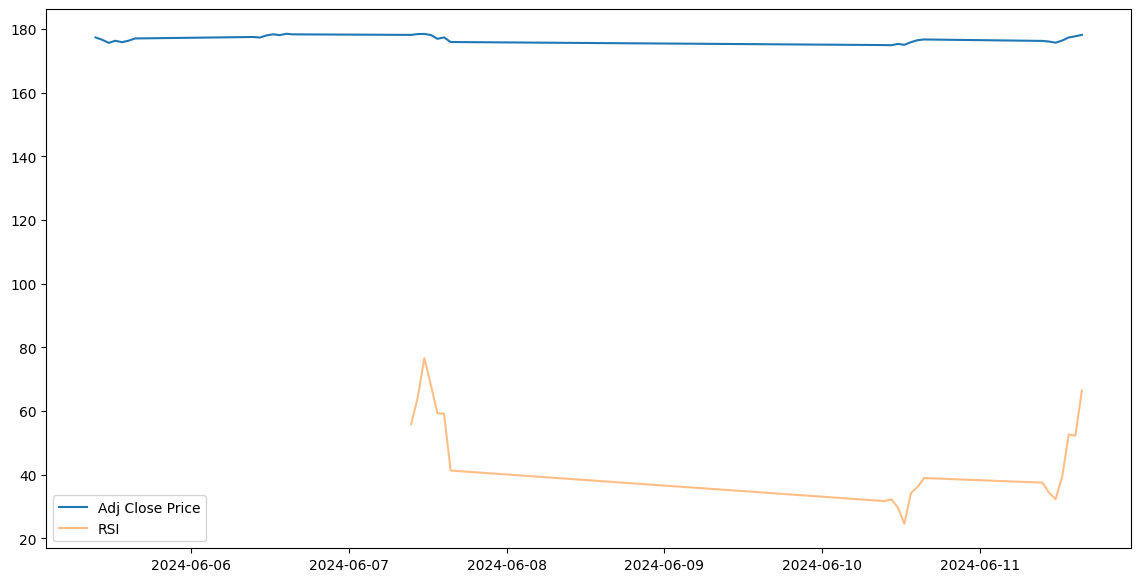

[*********************100%%**********************]  1 of 1 completed

TSLA
0


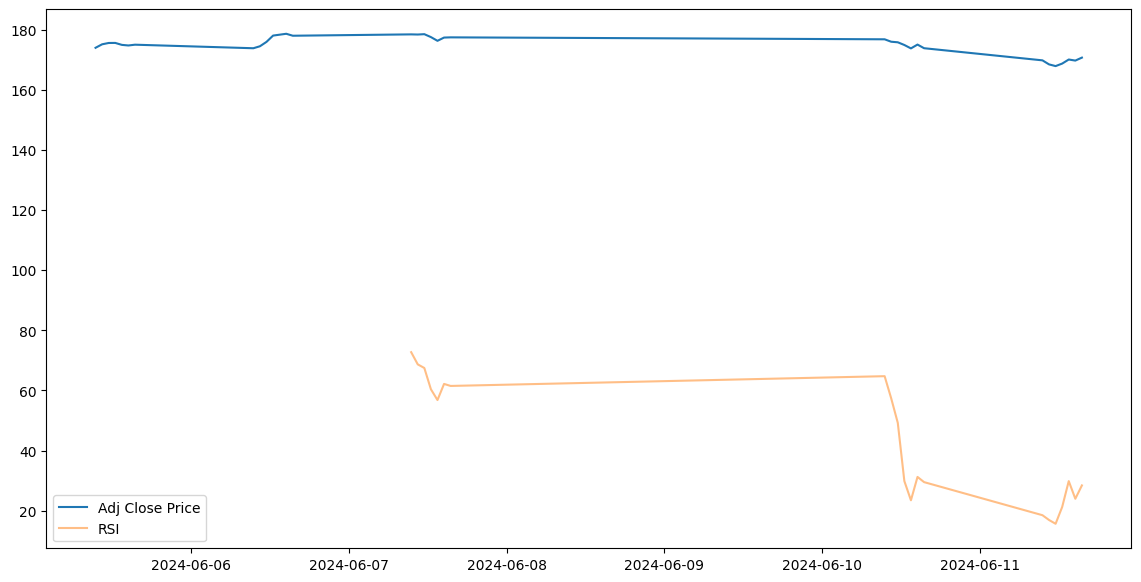

[*********************100%%**********************]  1 of 1 completed

META
-1


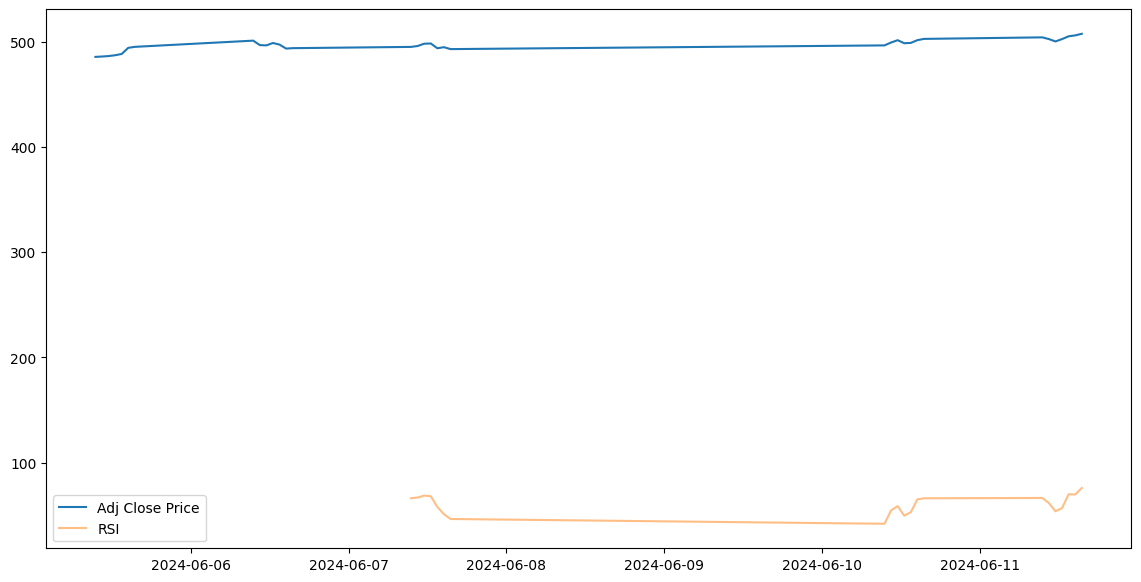

[*********************100%%**********************]  1 of 1 completed


NVDA
0


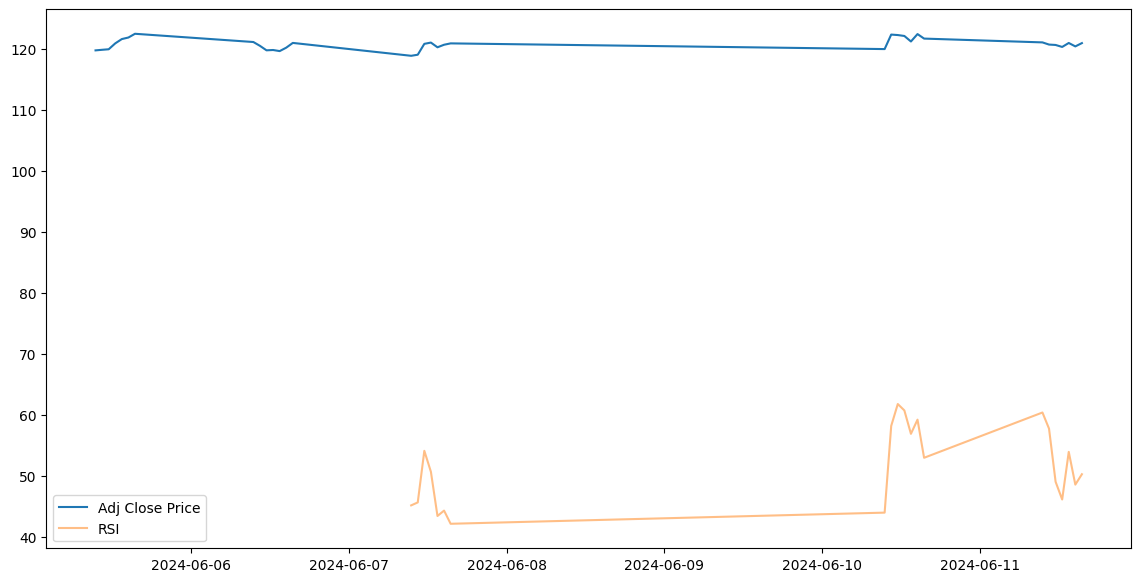

[*********************100%%**********************]  1 of 1 completed


AAPL
0


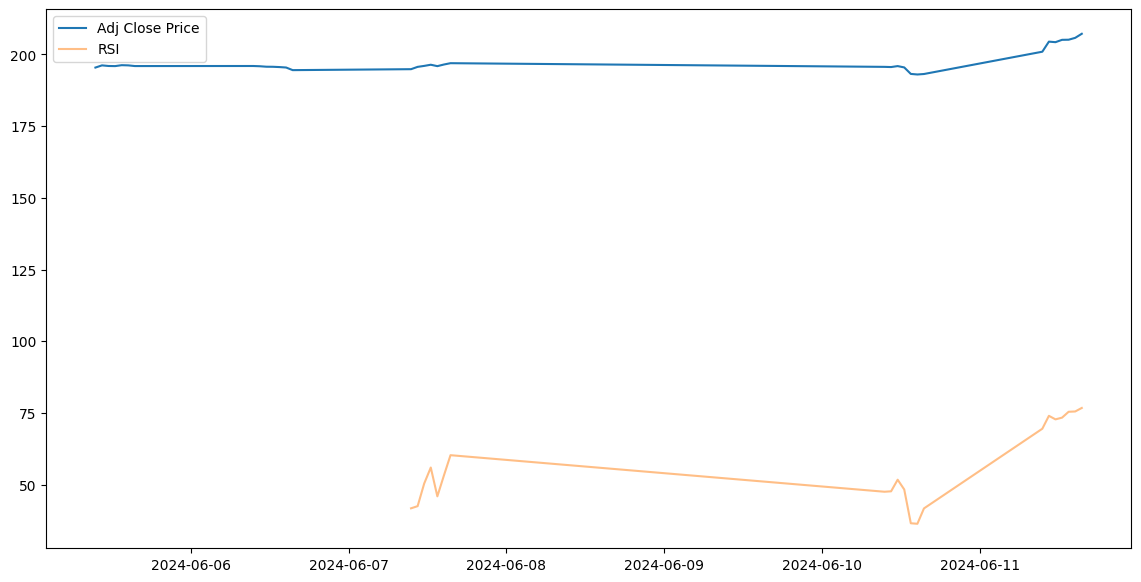

[*********************100%%**********************]  1 of 1 completed

EBAY
0


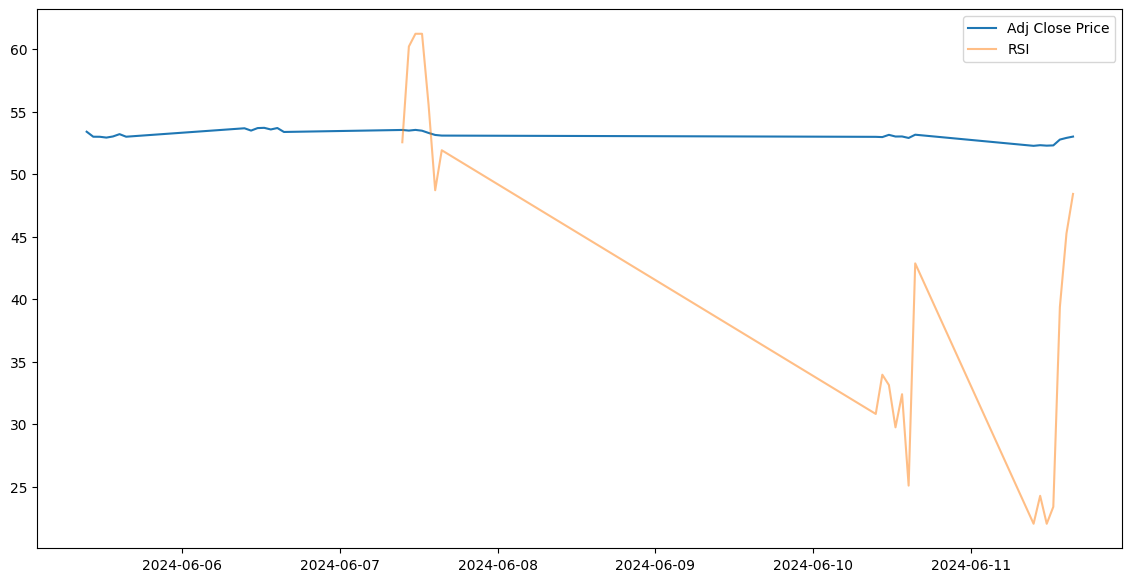

[*********************100%%**********************]  1 of 1 completed

AMZN
0


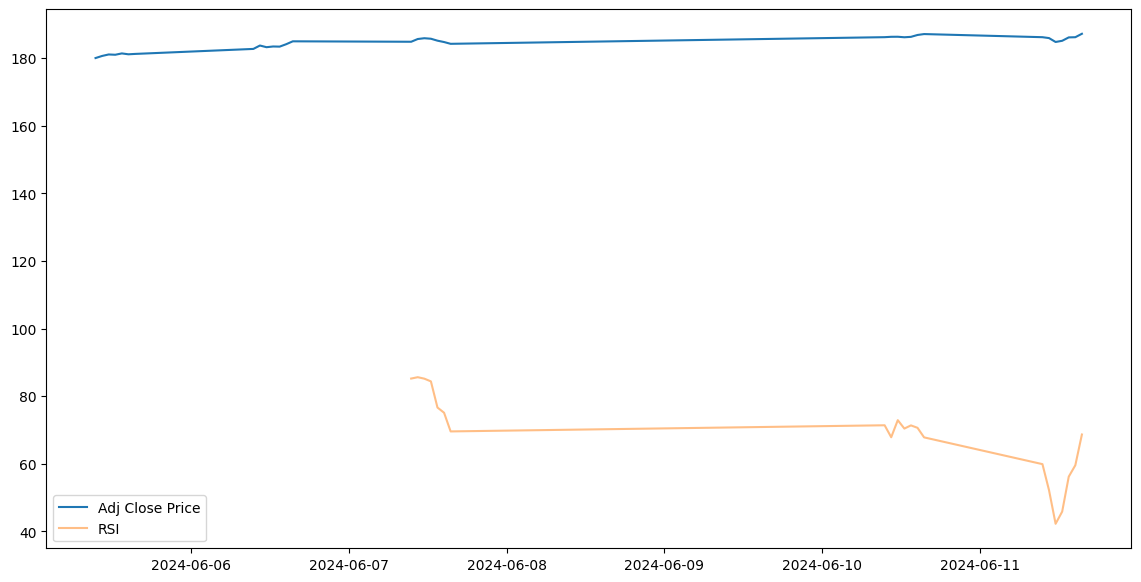

[*********************100%%**********************]  1 of 1 completed

NFLX
0


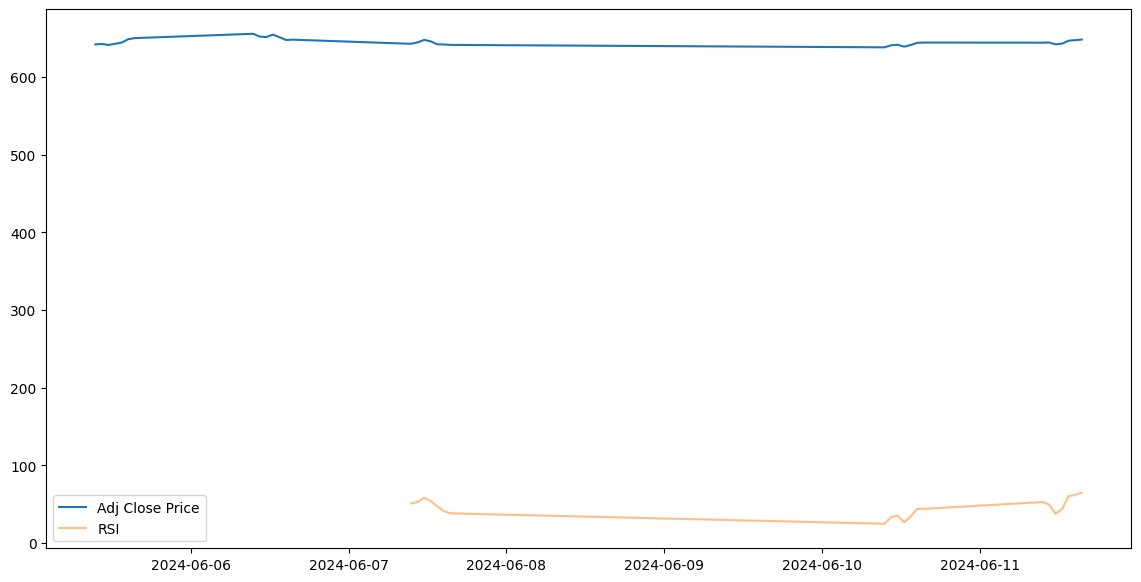

[*********************100%%**********************]  1 of 1 completed

MSFT
0


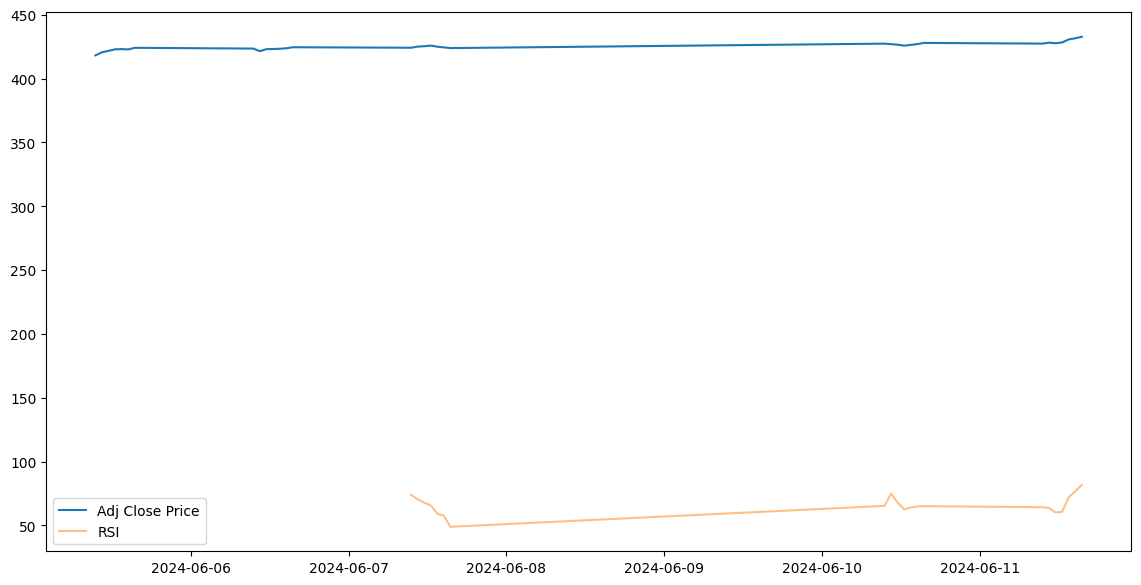

[*********************100%%**********************]  1 of 1 completed

INTC
-1


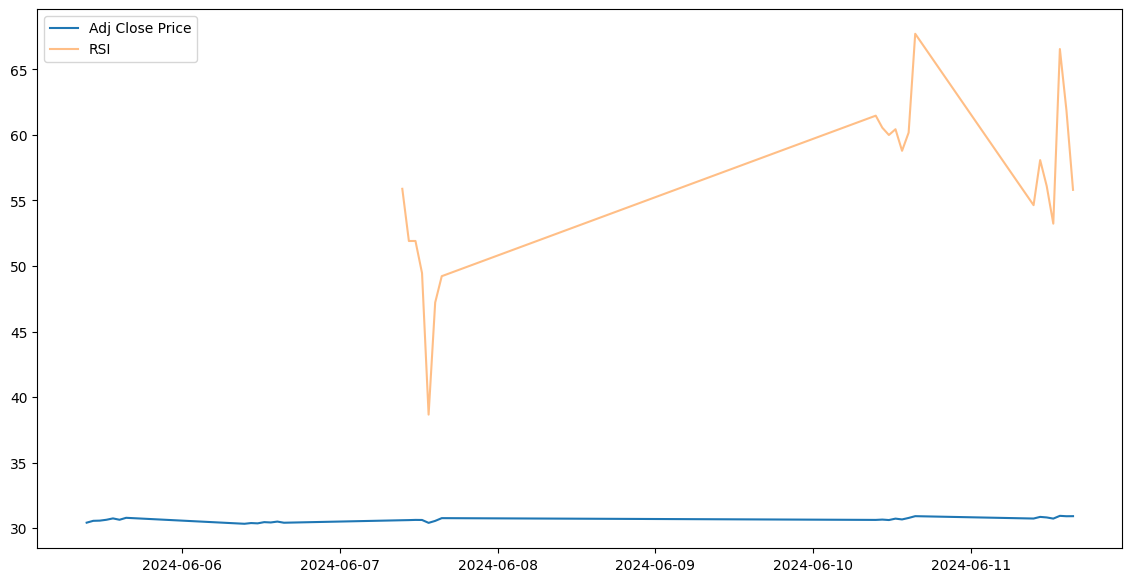

In [11]:
for stock_symbol in tickers:
    stock_data = yf.download(stock_symbol, period = "5d",  interval = "60m")
    print(stock_symbol)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Adj Close'], label='Adj Close Price')
    plt.plot(rsi_values[stock_symbol], label='RSI', alpha=0.5)
    print(signals[stock_symbol])
    plt.legend()
    plt.show()

Conclusions: For long term investing, such as weekly, there isn't a clear trend. For example when the RSI is in between 30 and 70 you keep the stock, however the stock doesn't stay around the same price as you expect it to and rather increases/decrease. Sometimes it is accurate, when rsi is above 70 you sell and the stock goes down and vice versa but using only RSI is not an accurate way to predict trends. For daily trends there is also not a very consistent predicition based on RSI.